# Autoreload when files change

In [1]:
%load_ext autoreload
%autoreload 2

# Import required things

In [2]:
from experiments.base import *
from experiments.pRCC_unet.module import *
from data.pRCC import *
from models.pRCC import *
import os
import config.params as config
from utils.plot import *

# Loading the dataset

In [3]:
#assumes that there is a folder called pRCC which has another folder called pRCC_nolabel inside it!
path = os.path.abspath("../../datasets/pRCC")
pRCC_dataset = pRCCDataset(path)

# Creating the module object

In [4]:
name = "pRCC_Unet_Autoencoder"
model = pRCCUnetAutoencoder().to(config.device)
save_dir = os.path.abspath(f"../../weights")
pRCC_module = pRCCModule(name, pRCC_dataset, model, save_dir)

# Training the model

Initialized scheduler


Total Epochs: 0.0% |          | 0/1 [00:00<?, ?it/s]

Epoch 1/1:   0%|          | 0/4 [00:00<?, ?it/s]

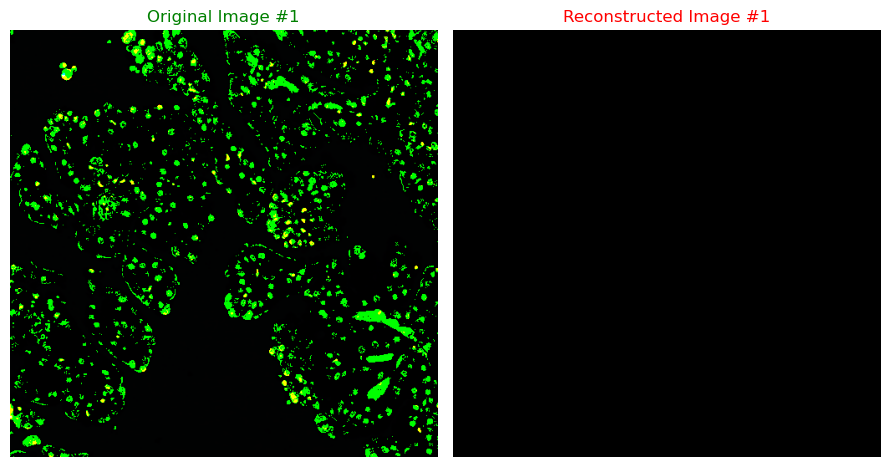

In [5]:
epoch_numbers, training_losses, validation_losses = pRCC_module.train(1)

# Testing the model

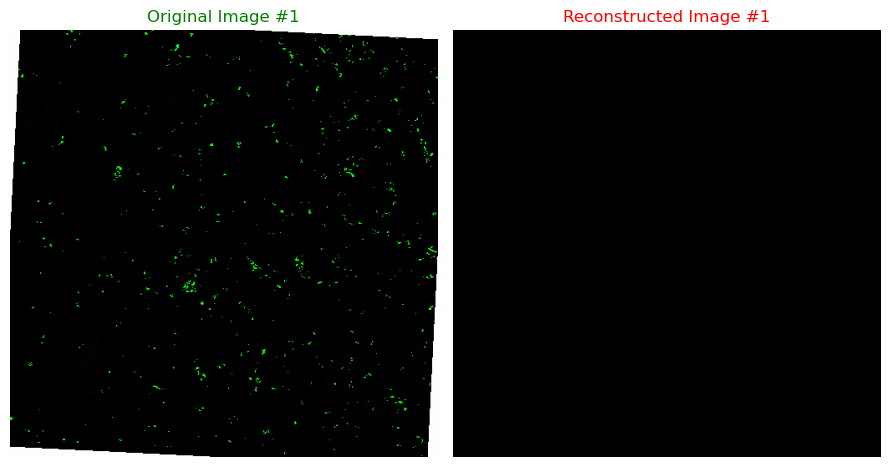

In [6]:
test_stats = pRCC_module.test_model()

In [7]:
test_stats

{'avg_test_loss': 0.15938496589660645}

# Showing the various graphs for the model

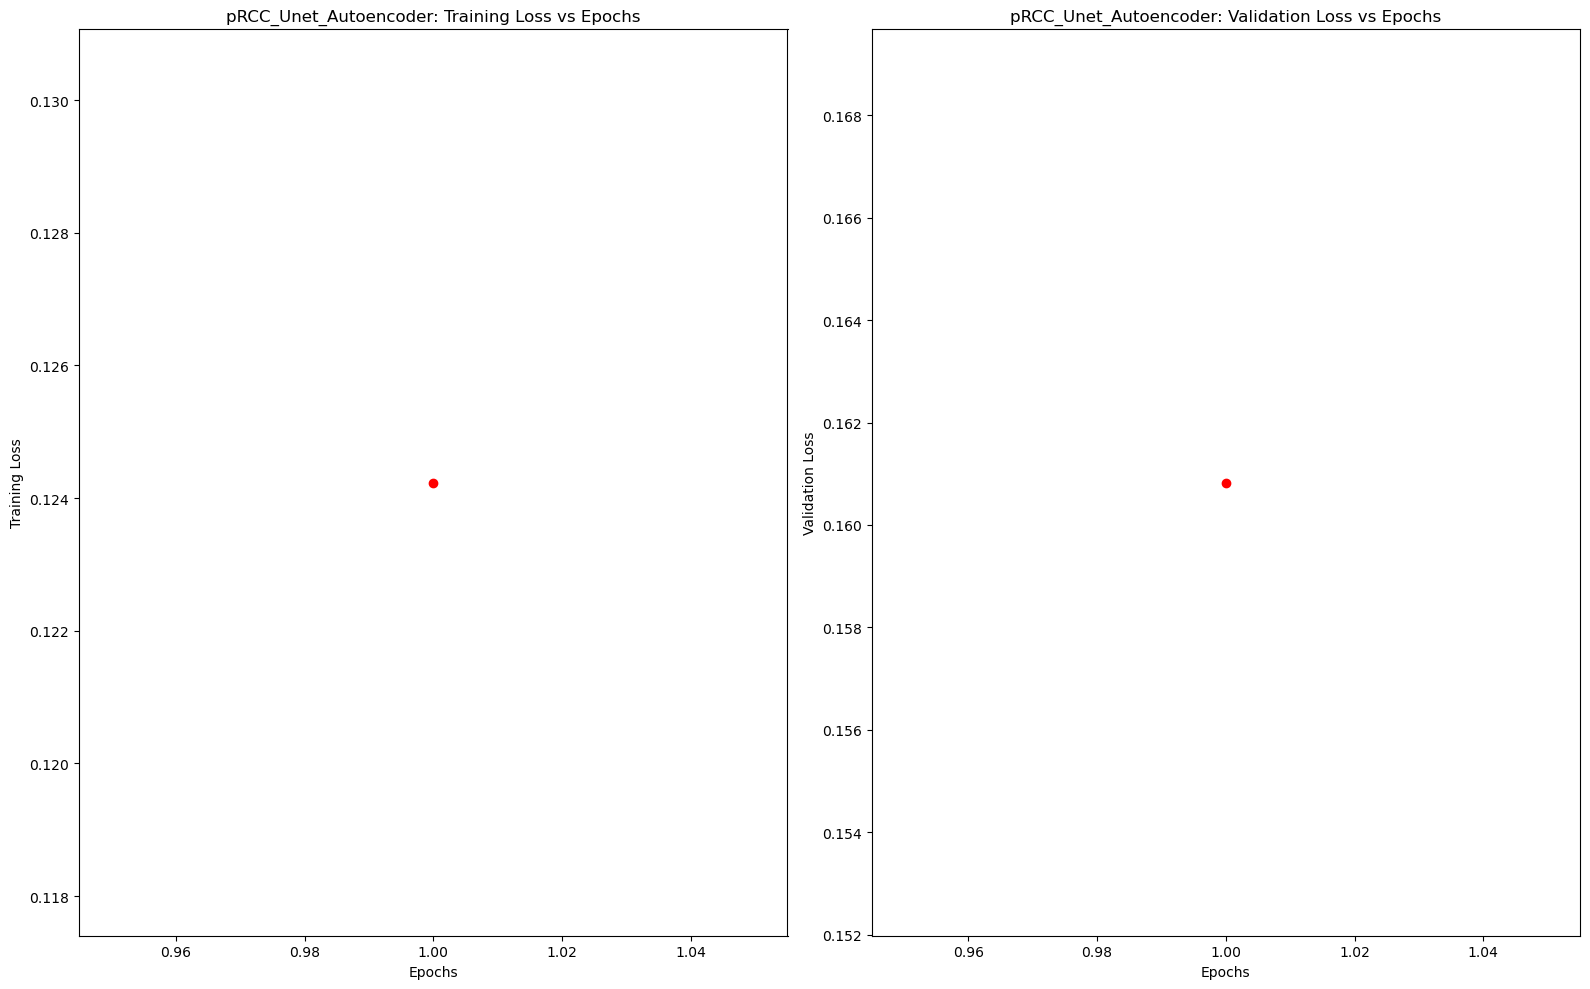

In [8]:
plot_model_stats(name, epoch_numbers, training_losses, validation_losses)